# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [4]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Length: 178, dtype: int32

In [4]:
X.shape

(178, 13)

In [5]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [6]:
X.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [7]:
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [8]:
X[X == 0].sum()

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
dtype: float64

## 1. Train a [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering model on the data set using 8 clusters and compute the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for the model.

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
k = KMeans(n_clusters=8).fit(X)

In [9]:
y_pred = k.labels_
y_pred

array([0, 0, 3, 4, 2, 4, 3, 3, 0, 0, 4, 3, 3, 0, 4, 3, 3, 0, 4, 6, 2, 2,
       0, 0, 6, 6, 3, 3, 6, 0, 3, 4, 0, 3, 0, 6, 6, 0, 0, 2, 6, 0, 0, 2,
       6, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 1, 2, 1, 5, 7, 7, 2,
       1, 1, 2, 2, 6, 7, 1, 0, 6, 1, 7, 1, 2, 1, 7, 2, 5, 1, 1, 1, 1, 5,
       2, 5, 1, 1, 1, 7, 7, 6, 5, 1, 2, 7, 2, 5, 1, 7, 2, 7, 1, 1, 7, 2,
       5, 7, 5, 1, 7, 7, 1, 7, 7, 5, 5, 1, 7, 7, 7, 7, 7, 1, 7, 5, 5, 1,
       5, 5, 5, 2, 2, 1, 5, 5, 5, 2, 1, 5, 6, 6, 7, 5, 5, 5, 1, 1, 1, 2,
       5, 2, 1, 6, 2, 5, 1, 2, 5, 2, 5, 1, 2, 2, 2, 5, 1, 1, 2, 2, 2, 6,
       6, 5])

In [10]:
y_pred_cross = pd.crosstab(y_pred, y)
y_pred_cross

col_0,0,1,2
row_0,,,
0,23,1,0
1,0,23,11
2,5,11,14
3,17,0,0
4,6,0,0
5,0,11,17
6,8,3,5
7,0,22,1


In [11]:
silhouette_score(X, y_pred)

0.5398971441034137

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [16]:
k_5 = KMeans(n_clusters=5).fit(X)
y_pred_5 = k_5.labels_

In [17]:
y_pred_cross_5 = pd.crosstab(y_pred_5, y)
y_pred_cross_5

col_0,0,1,2
row_0,,,
0,12,5,9
1,0,45,12
2,20,0,0
3,1,20,27
4,26,1,0


In [18]:
silhouette_5 = silhouette_score(X,y_pred_5)
silhouette_5

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [19]:
k_3 = KMeans(n_clusters=3).fit(X)
y_pred_3 = k_3.labels_
y_pred_3

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

In [21]:
y_pred_cross_3 = pd.crosstab(y_pred_3, y)
y_pred_cross_3

col_0,0,1,2
row_0,,,
0,0,50,19
1,46,1,0
2,13,20,29


In [22]:
silhouette_3 = silhouette_score(X,y_pred_3)
silhouette_3

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

In [23]:
from yellowbrick.cluster import KElbowVisualizer

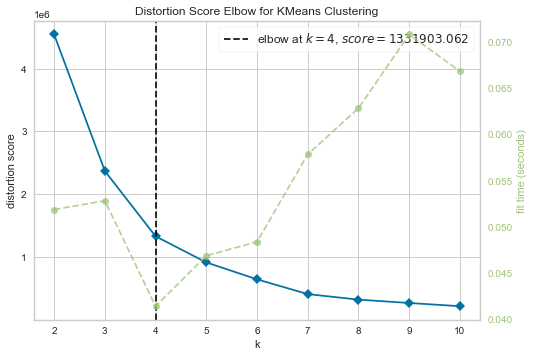

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
visual = KElbowVisualizer(estimator= KMeans(), k=10)
visual.fit(X)
visual.show()

## 5. Try performing the same elbow tests with an [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) model and compare the results you get to the KMeans results.

In [27]:
from sklearn.cluster import AgglomerativeClustering

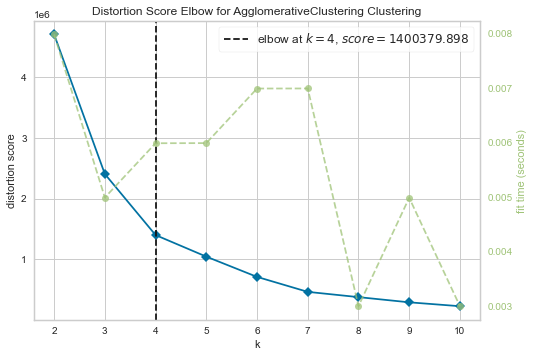

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
visual = KElbowVisualizer(estimator= AgglomerativeClustering(), k=10)
visual.fit(X)
visual.show()

## 6. Create and plot a scatter matrix (pairplot) showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [15]:
kmean = KMeans(n_clusters=4)
kmean.fit(X)
X["clusters"] = kmean.labels_

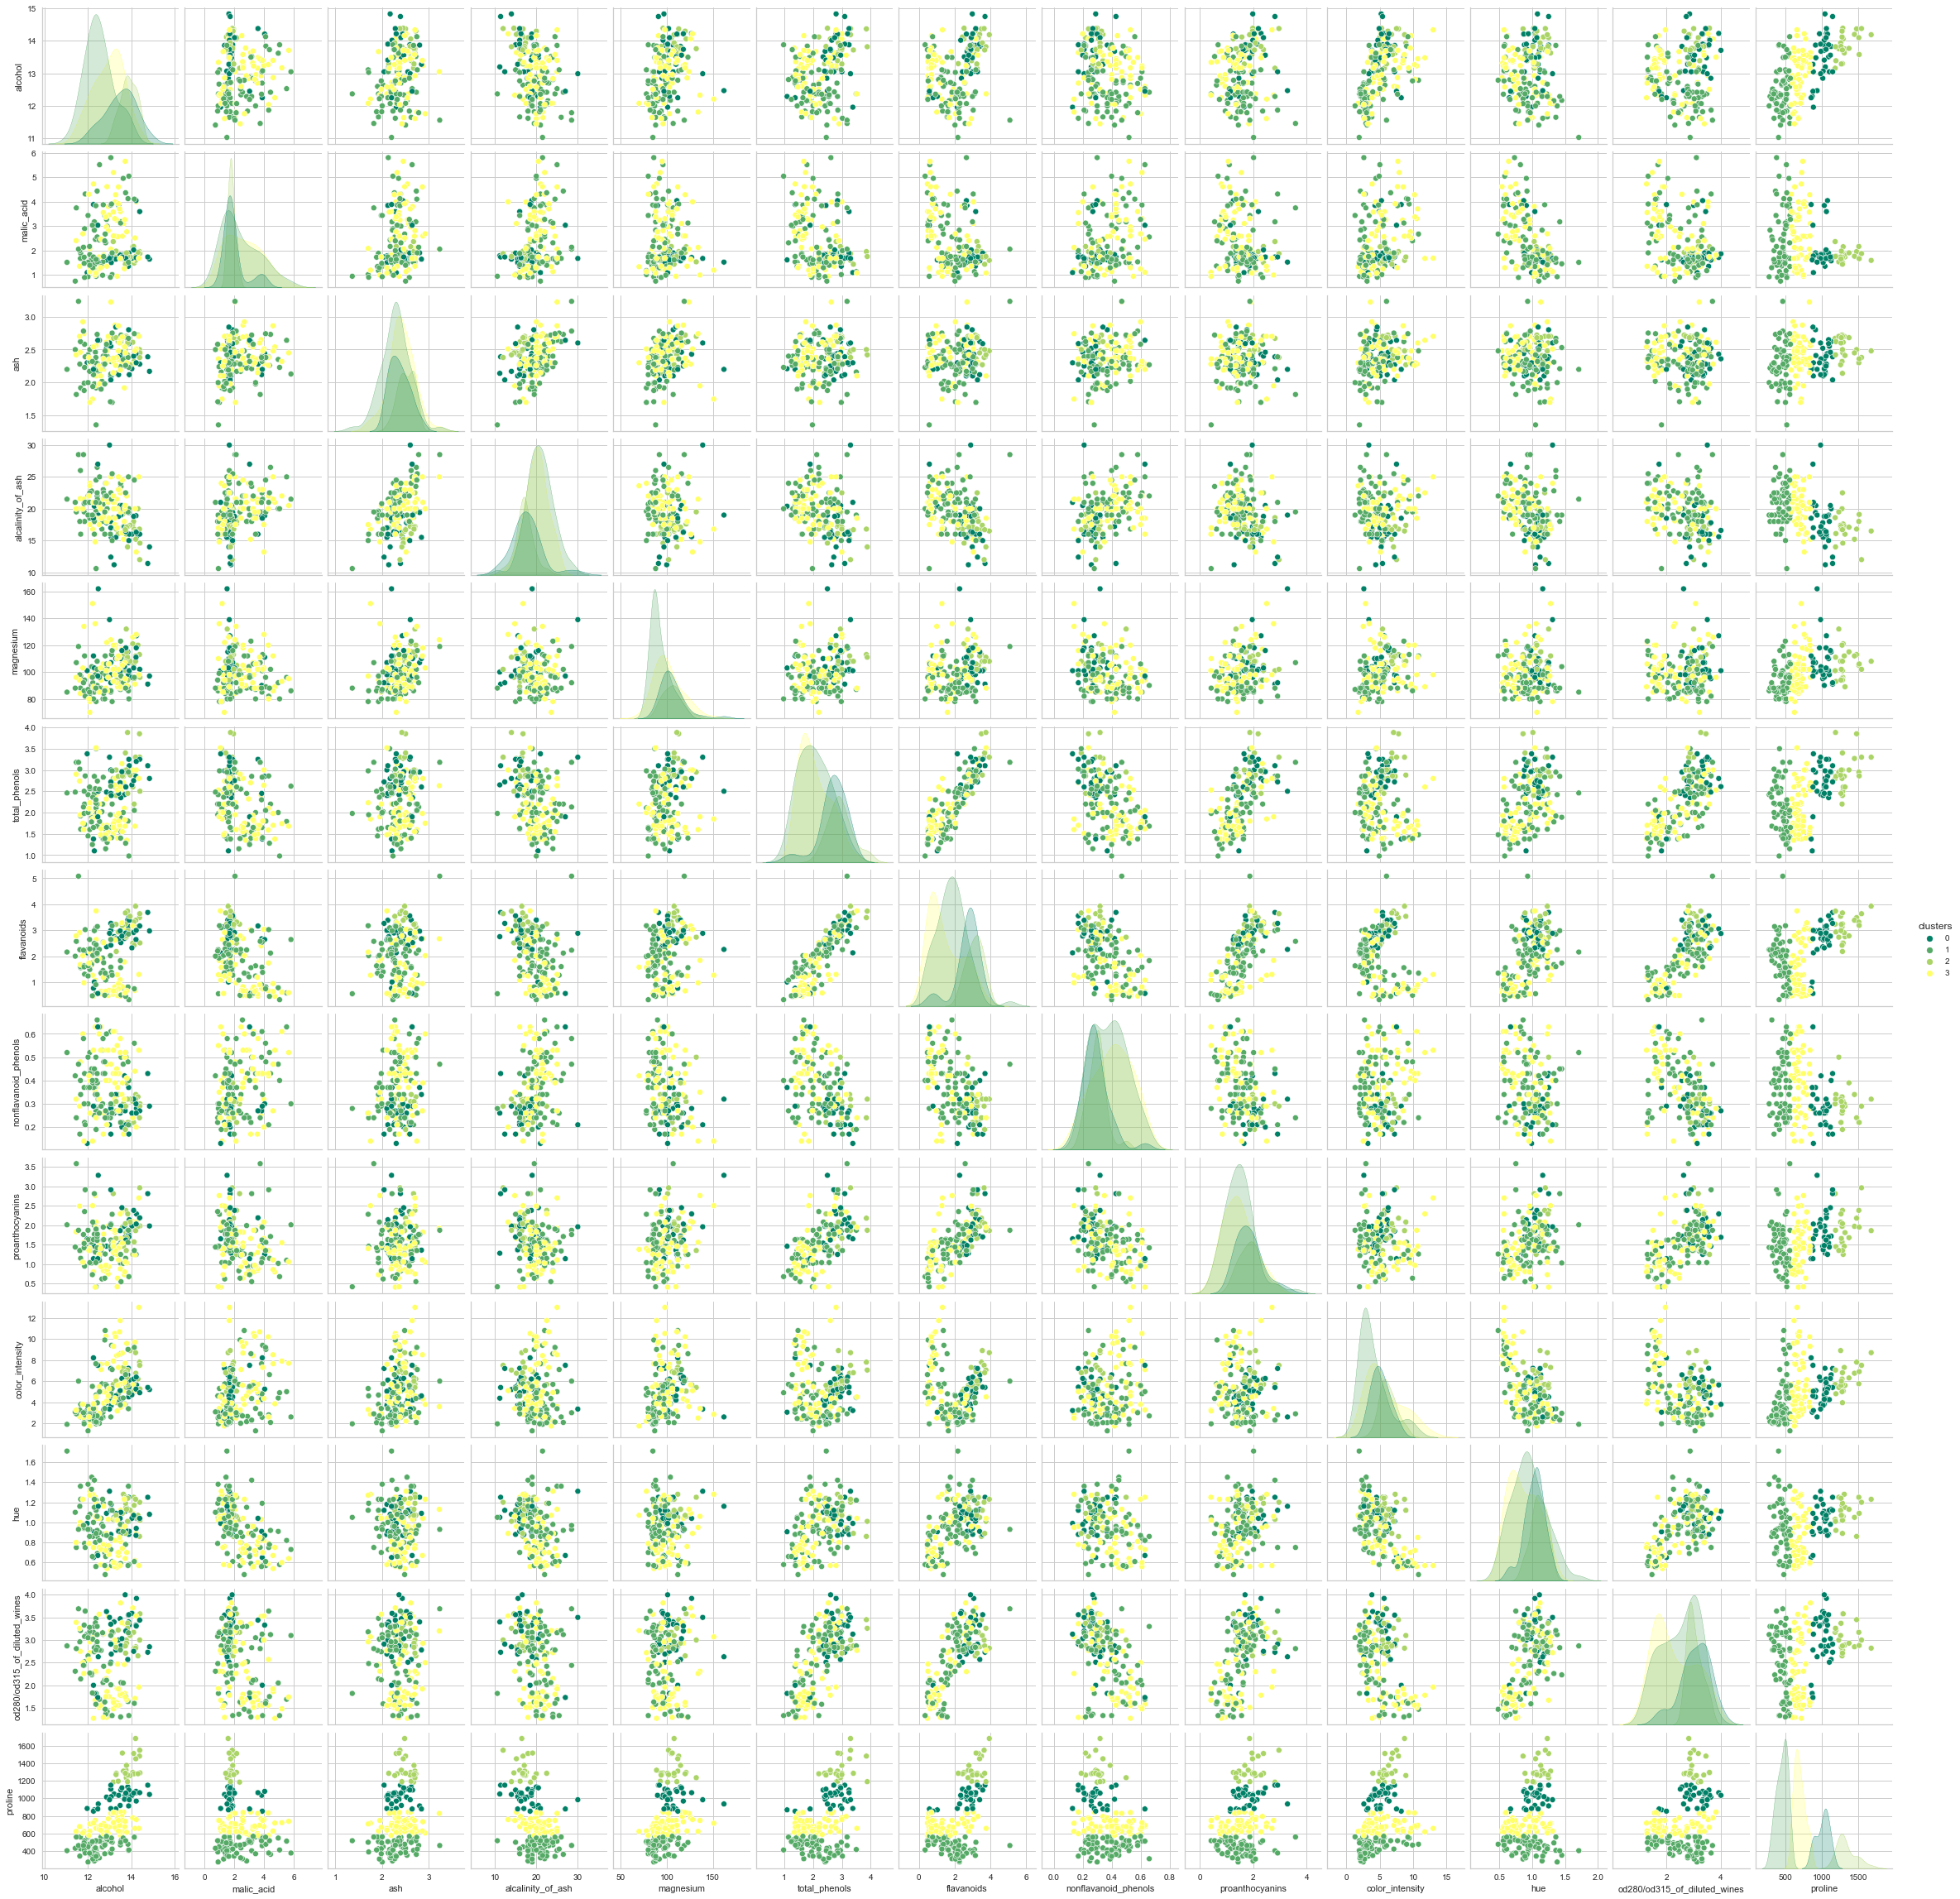

In [71]:
sns.pairplot(X, hue="clusters", palette="summer")

## 7. Apply a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) transform and plot the first two principle components with the plot point colors determined by cluster.

In [72]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(2)
X_pca = pd.DataFrame(pca.fit_transform(X.drop(columns=["clusters"])), columns=["PC1","PC2"])

C:\Users\magar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

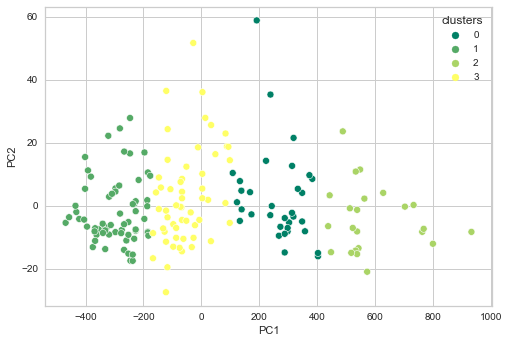

In [85]:
sns.scatterplot(X_pca["PC1"],X_pca["PC2"], hue=X["clusters"], palette="summer")

In [96]:
X_pca[["PC1", "PC2"]]

,PC1,PC2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995
...,...,...
173,-6.980211,-4.541137
174,3.131605,2.335191
175,88.458074,18.776285
176,93.456242,18.670819


## 8. Generate a series of [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) plots showing the clusters at a variety of perplexities.

In [12]:
from sklearn.manifold import TSNE

In [13]:
def plot_tsne_perplexity(per):
    tsne = TSNE(n_components=2, perplexity=per, n_iter=1000, learning_rate=200)
    df_tsne = pd.DataFrame(tsne.fit_transform(X.drop(columns=["clusters"])))
    return sns.scatterplot(df_tsne[0],df_tsne[1], hue=X["clusters"], palette="summer")

C:\Users\magar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

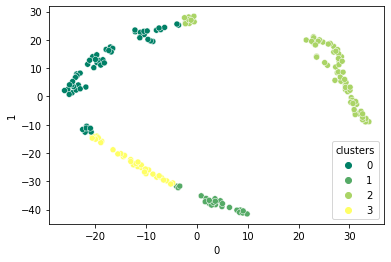

In [16]:
plot_tsne_perplexity(10)

C:\Users\magar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

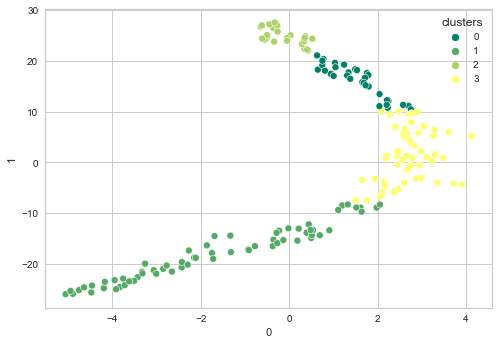

In [132]:
plot_tsne_perplexity(20)

C:\Users\magar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

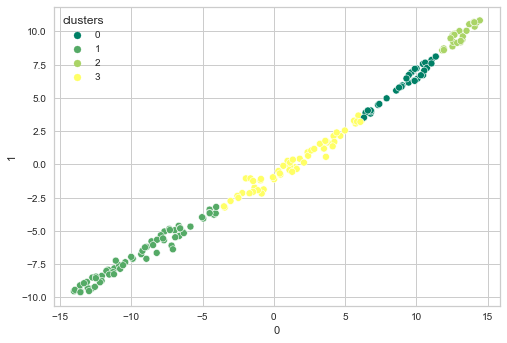

In [133]:
plot_tsne_perplexity(30)

C:\Users\magar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

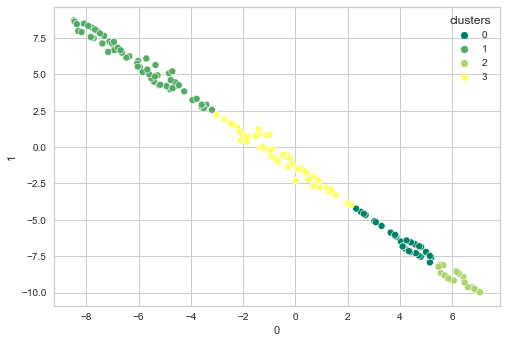

In [134]:
plot_tsne_perplexity(40)

C:\Users\magar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

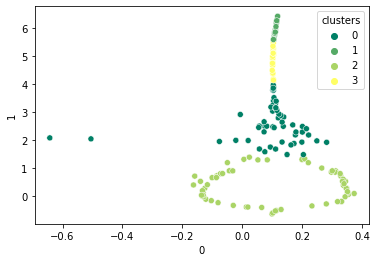

In [20]:
plot_tsne_perplexity(100)